In [1]:
#Import Library that will be used
import pandas as pd
import joblib
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [2]:
#input the dataset
X_train = pd.read_csv('https://raw.githubusercontent.com/AufaAnasin/Implement-PSO-SVM-GeneExpression-LungCancer/main/dataset-after-preparation/X_train.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/AufaAnasin/Implement-PSO-SVM-GeneExpression-LungCancer/main/dataset-after-preparation/X_test.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/AufaAnasin/Implement-PSO-SVM-GeneExpression-LungCancer/main/dataset-after-preparation/y_train.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/AufaAnasin/Implement-PSO-SVM-GeneExpression-LungCancer/main/dataset-after-preparation/y_test.csv')
X_valid = pd.read_csv('https://raw.githubusercontent.com/AufaAnasin/Implement-PSO-SVM-GeneExpression-LungCancer/main/dataset-after-preparation/X_valid.csv')
y_valid = pd.read_csv('https://raw.githubusercontent.com/AufaAnasin/Implement-PSO-SVM-GeneExpression-LungCancer/main/dataset-after-preparation/y_valid.csv')

#input the selected feature by using variance threshold
VT_selected_feature_Zoo = joblib.load('VT_selected_feature_Zoo.pkl')
pso_linear = joblib.load('PSO-selected-feature/pso-linear.pkl')
pso_rbf = joblib.load('PSO-selected-feature/pso-rbf.pkl')
pso_poly = joblib.load('PSO-selected-feature/pso-poly.pkl')

In [3]:
#put the selected feature on the dataset
X_train_VT = X_train[VT_selected_feature_Zoo]
X_train_linear = X_train[pso_linear]
X_train_rbf = X_train[pso_rbf]
X_train_poly = X_train[pso_poly]

In [4]:
X_train_VT

,209720_s_at,217653_x_at,215604_x_at,214594_x_at,216609_at,205292_s_at,208864_s_at,217679_x_at,206056_x_at,217715_x_at,...,206276_at,213998_s_at,221728_x_at,214370_at,206529_x_at,212657_s_at,202499_s_at,209351_at,211719_x_at,214218_s_at
0,3.344991,2.453417,2.791803,2.925022,2.398584,3.155353,3.308539,2.887528,2.255382,2.329962,...,2.709466,2.262944,2.359044,1.730669,1.644678,2.542793,1.745022,2.335801,2.485035,1.647696
1,2.484899,2.374166,2.892857,2.843382,1.740446,2.012888,2.615365,2.964929,2.523705,2.669265,...,2.498725,2.254940,2.581174,2.246072,1.781764,2.937305,2.142583,3.473841,2.594997,1.841744
2,3.241720,2.039686,2.535528,2.417102,2.043563,3.107629,3.331453,2.522970,1.998979,1.992250,...,2.818672,2.180275,2.326296,1.825109,1.615983,2.749943,1.712185,2.140610,2.791282,1.675730
3,3.157989,2.271643,2.558746,2.420803,2.203144,3.104328,3.316617,2.642478,2.071765,2.071983,...,2.989499,2.490808,2.388272,1.775927,1.796658,2.749636,1.758788,2.436937,3.133277,1.764108
4,3.252930,2.058389,2.513571,2.548509,2.120331,3.150586,3.354173,2.615843,2.049049,2.119348,...,2.183749,2.152189,2.301934,1.768501,1.631852,2.629835,1.710050,2.124228,2.328392,1.649341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,3.023559,2.284004,2.825340,2.754746,1.764710,2.379167,2.902023,2.728322,2.466654,2.539680,...,2.568829,2.512920,2.287103,1.860208,1.638666,2.663446,1.731018,2.416373,2.166555,1.513259
89,3.299427,2.360078,2.687610,2.799913,2.515608,3.135428,3.342398,2.856345,2.265811,2.276846,...,2.493076,2.279778,3.035673,2.478638,2.311450,2.853325,2.156795,2.135665,2.926642,2.459417
90,3.184152,2.370920,2.815919,2.750996,2.412423,2.939161,3.357292,2.947863,2.422262,2.373526,...,2.611951,2.166706,2.313259,2.832474,1.887824,3.185290,2.836760,2.268364,2.930293,1.689884
91,3.185631,2.597250,2.811467,2.788203,2.166725,3.187932,3.364191,3.005933,2.245423,2.372416,...,2.260344,2.170031,2.412690,1.743820,1.629251,2.659584,1.691010,2.642236,2.776883,1.776972


In [5]:
X_train_linear

,209720_s_at,205292_s_at,206056_x_at,217715_x_at,209860_s_at,216858_x_at,213313_at,206332_s_at,217898_at,218729_at,...,206825_at,204416_x_at,32128_at,210495_x_at,217678_at,204446_s_at,208835_s_at,212657_s_at,202499_s_at,214218_s_at
0,3.344991,3.155353,2.255382,2.329962,3.145575,2.770697,2.909007,2.838751,2.910411,2.995479,...,3.076373,2.828039,1.797072,2.522666,2.144286,2.172134,2.729591,2.542793,1.745022,1.647696
1,2.484899,2.012888,2.523705,2.669265,2.177807,3.045643,2.207417,2.370220,2.214957,2.477706,...,2.344020,3.254272,2.023680,2.652861,2.243129,2.312693,2.526951,2.937305,2.142583,1.841744
2,3.241720,3.107629,1.998979,1.992250,3.108881,2.462367,2.852706,2.917264,2.941476,3.052831,...,2.387877,3.257693,2.145266,2.852677,1.932932,2.345445,2.599972,2.749943,1.712185,1.675730
3,3.157989,3.104328,2.071765,2.071983,3.221331,2.599446,2.797082,2.839564,2.965179,2.972104,...,2.765278,3.212239,2.297747,3.181532,2.201685,2.661064,2.640637,2.749636,1.758788,1.764108
4,3.252930,3.150586,2.049049,2.119348,3.166517,2.536396,2.896580,2.954155,2.994051,3.130301,...,2.851571,2.677244,1.811383,2.435434,2.096590,2.134603,2.612154,2.629835,1.710050,1.649341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,3.023559,2.379167,2.466654,2.539680,2.518010,2.791295,2.309154,2.246767,2.494970,2.448266,...,2.724516,3.092339,2.007212,2.176133,2.029836,2.068126,2.478152,2.663446,1.731018,1.513259
89,3.299427,3.135428,2.265811,2.276846,3.105218,2.691135,2.647308,2.826638,2.888478,3.009632,...,2.440176,3.010841,2.183356,2.913549,2.384489,2.421271,2.540756,2.853325,2.156795,2.459417
90,3.184152,2.939161,2.422262,2.373526,2.987704,2.843190,2.650054,2.785921,2.795703,2.928926,...,2.708860,3.279334,2.332849,2.939938,2.323402,2.788217,2.562054,3.185290,2.836760,1.689884
91,3.185631,3.187932,2.245423,2.372416,3.177911,2.820196,2.932713,2.770413,2.964136,3.060965,...,3.063470,2.919577,1.830337,2.859593,2.119676,2.493351,2.531434,2.659584,1.691010,1.776972


In [6]:
X_train_rbf

,217653_x_at,216609_at,208864_s_at,217679_x_at,206056_x_at,217715_x_at,215907_at,208635_x_at,200853_at,216858_x_at,...,209921_at,206825_at,32128_at,210495_x_at,217678_at,206276_at,221728_x_at,202499_s_at,209351_at,211719_x_at
0,2.453417,2.398584,3.308539,2.887528,2.255382,2.329962,2.625840,3.448887,2.964631,2.770697,...,2.136223,3.076373,1.797072,2.522666,2.144286,2.709466,2.359044,1.745022,2.335801,2.485035
1,2.374166,1.740446,2.615365,2.964929,2.523705,2.669265,2.931645,2.705386,2.517833,3.045643,...,2.165231,2.344020,2.023680,2.652861,2.243129,2.498725,2.581174,2.142583,3.473841,2.594997
2,2.039686,2.043563,3.331453,2.522970,1.998979,1.992250,2.413901,3.420030,3.028604,2.462367,...,1.885940,2.387877,2.145266,2.852677,1.932932,2.818672,2.326296,1.712185,2.140610,2.791282
3,2.271643,2.203144,3.316617,2.642478,2.071765,2.071983,2.335267,3.455467,3.061356,2.599446,...,2.413414,2.765278,2.297747,3.181532,2.201685,2.989499,2.388272,1.758788,2.436937,3.133277
4,2.058389,2.120331,3.354173,2.615843,2.049049,2.119348,2.449684,3.435092,3.069910,2.536396,...,2.114550,2.851571,1.811383,2.435434,2.096590,2.183749,2.301934,1.710050,2.124228,2.328392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2.284004,1.764710,2.902023,2.728322,2.466654,2.539680,2.555104,3.091178,2.421516,2.791295,...,1.881764,2.724516,2.007212,2.176133,2.029836,2.568829,2.287103,1.731018,2.416373,2.166555
89,2.360078,2.515608,3.342398,2.856345,2.265811,2.276846,2.561677,3.374319,2.988326,2.691135,...,2.573440,2.440176,2.183356,2.913549,2.384489,2.493076,3.035673,2.156795,2.135665,2.926642
90,2.370920,2.412423,3.357292,2.947863,2.422262,2.373526,2.668831,3.356049,2.889560,2.843190,...,2.297847,2.708860,2.332849,2.939938,2.323402,2.611951,2.313259,2.836760,2.268364,2.930293
91,2.597250,2.166725,3.364191,3.005933,2.245423,2.372416,2.664808,3.426723,3.062880,2.820196,...,2.004950,3.063470,1.830337,2.859593,2.119676,2.260344,2.412690,1.691010,2.642236,2.776883


In [7]:
X_train_poly

,215604_x_at,214594_x_at,216609_at,205292_s_at,206056_x_at,217715_x_at,209860_s_at,216858_x_at,200627_at,206332_s_at,...,206785_s_at,201909_at,204058_at,203980_at,210445_at,219759_at,204446_s_at,205680_at,206276_at,214218_s_at
0,2.791803,2.925022,2.398584,3.155353,2.255382,2.329962,3.145575,2.770697,3.321876,2.838751,...,1.879401,3.334097,2.132238,2.418199,2.946261,2.094894,2.172134,2.659191,2.709466,1.647696
1,2.892857,2.843382,1.740446,2.012888,2.523705,2.669265,2.177807,3.045643,2.671736,2.370220,...,1.939620,2.826928,2.042355,2.647297,2.415194,2.040569,2.312693,2.497877,2.498725,1.841744
2,2.535528,2.417102,2.043563,3.107629,1.998979,1.992250,3.108881,2.462367,3.333166,2.917264,...,1.612992,3.367745,1.888423,2.603538,2.946969,1.706638,2.345445,2.490195,2.818672,1.675730
3,2.558746,2.420803,2.203144,3.104328,2.071765,2.071983,3.221331,2.599446,3.340570,2.839564,...,1.885613,3.372844,1.940706,2.696257,2.930095,1.979407,2.661064,2.706172,2.989499,1.764108
4,2.513571,2.548509,2.120331,3.150586,2.049049,2.119348,3.166517,2.536396,3.333339,2.954155,...,1.890002,3.364466,2.194155,2.366365,2.947156,2.352372,2.134603,2.810219,2.183749,1.649341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2.825340,2.754746,1.764710,2.379167,2.466654,2.539680,2.518010,2.791295,2.861601,2.246767,...,1.723936,3.278083,1.723213,2.327027,2.859123,1.771904,2.068126,2.623996,2.568829,1.513259
89,2.687610,2.799913,2.515608,3.135428,2.265811,2.276846,3.105218,2.691135,3.214207,2.826638,...,1.653658,2.482345,1.998015,2.488295,2.599052,1.758593,2.421271,2.438956,2.493076,2.459417
90,2.815919,2.750996,2.412423,2.939161,2.422262,2.373526,2.987704,2.843190,3.261290,2.785921,...,1.614970,3.225277,1.894659,3.073461,2.770859,1.985057,2.788217,2.269176,2.611951,1.689884
91,2.811467,2.788203,2.166725,3.187932,2.245423,2.372416,3.177911,2.820196,3.369255,2.770413,...,1.798858,3.372684,2.001489,2.723479,3.129414,2.115645,2.493351,2.608662,2.260344,1.776972


In [8]:
print("X_train_VT shape: ", X_train_VT.shape)
print("X_train_linear shape: ", X_train_linear.shape)
print("X_train_rbf shape: ", X_train_rbf.shape)
print("X_train_poly shape: ", X_train_poly.shape)

X_train_VT shape:  (93, 1028)
X_train_linear shape:  (93, 485)
X_train_rbf shape:  (93, 494)
X_train_poly shape:  (93, 492)


## Before Tuning with Hyperparameter

##### Default Parameter on Linear Kernel

In [9]:
### create model
clf_linear = SVC(kernel='linear')

### cross-validation evaluation
cv_linear = cross_val_score(clf_linear, X_train_linear, y_train.values.ravel(), scoring='accuracy', cv=5)

### Show CV result
print("%0.2f [LINEAR] accuracy with a standard deviation of %0.2f" % (cv_linear.mean(), cv_linear.std()))

0.70 [LINEAR] accuracy with a standard deviation of 0.08


##### Default Parameter on RBF Kernel

In [10]:
### create model
clf_rbf = SVC(kernel='rbf')

### cross-validation evaluation
cv_rbf = cross_val_score(clf_rbf, X_train_rbf, y_train.values.ravel(), scoring='accuracy', cv=5)

### Show CV result
print("%0.2f [RBF] accuracy with a standard deviation of %0.2f" % (cv_rbf.mean(), cv_rbf.std()))

0.74 [RBF] accuracy with a standard deviation of 0.04


##### Default Parameter on Poly Kernel

In [11]:
### create model
clf_poly = SVC(kernel='poly')

### cross-validation evaluation
cv_poly = cross_val_score(clf_poly, X_train_poly, y_train.values.ravel(), scoring='accuracy', cv=5)

### Show CV result
print("%0.2f [POLY] accuracy with a standard deviation of %0.2f" % (cv_poly.mean(), cv_poly.std()))

0.73 [POLY] accuracy with a standard deviation of 0.10


## Tuning Parameter with GridSearchCV

##### Linear Kernel

In [12]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['linear'],
#               'epsilon':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'degree':[1, 2, 3, 4, 5, 6],
              'gamma' :['auto', 'scale']
             }
 
grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3) 
# fitting the model for grid search
grid.fit(X_train_linear, y_train.values.ravel())

#saving the grid on each params into the pkl 
joblib.dump(grid, "params_pkl/grid_linear.pkl")

selected_kernel_linear = grid.best_params_['kernel']
selected_C_linear = grid.best_params_['C']
selected_gamma_linear = grid.best_params_['gamma']
# selected_epsilon_linear = grid.best_params_['epsilon']
selected_degree_linear = grid.best_params_['degree']
best_params_linear_ht = grid.best_params_
model_looks_linear_HT = grid.best_estimator_

joblib.dump(best_params_linear_ht, "params_pkl/best_params_linear_ht.pkl")
joblib.dump(model_looks_linear_HT, "params_pkl/model_looks_linear_HT.pkl")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END C=0.001, degree=1, gamma=auto, kernel=linear;, score=0.474 total time=   0.0s
[CV 2/5] END C=0.001, degree=1, gamma=auto, kernel=linear;, score=0.526 total time=   0.0s
[CV 3/5] END C=0.001, degree=1, gamma=auto, kernel=linear;, score=0.684 total time=   0.0s
[CV 4/5] END C=0.001, degree=1, gamma=auto, kernel=linear;, score=0.500 total time=   0.0s
[CV 5/5] END C=0.001, degree=1, gamma=auto, kernel=linear;, score=0.500 total time=   0.0s
[CV 1/5] END C=0.001, degree=1, gamma=scale, kernel=linear;, score=0.474 total time=   0.0s
[CV 2/5] END C=0.001, degree=1, gamma=scale, kernel=linear;, score=0.526 total time=   0.0s
[CV 3/5] END C=0.001, degree=1, gamma=scale, kernel=linear;, score=0.684 total time=   0.0s
[CV 4/5] END C=0.001, degree=1, gamma=scale, kernel=linear;, score=0.500 total time=   0.0s
[CV 5/5] END C=0.001, degree=1, gamma=scale, kernel=linear;, score=0.500 total time=   0.0s
[CV 1/5] END C=0.001, d

[CV 1/5] END C=0.1, degree=4, gamma=auto, kernel=linear;, score=0.895 total time=   0.0s
[CV 2/5] END C=0.1, degree=4, gamma=auto, kernel=linear;, score=0.737 total time=   0.0s
[CV 3/5] END C=0.1, degree=4, gamma=auto, kernel=linear;, score=0.789 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, gamma=auto, kernel=linear;, score=0.722 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, gamma=auto, kernel=linear;, score=0.667 total time=   0.0s
[CV 1/5] END C=0.1, degree=4, gamma=scale, kernel=linear;, score=0.895 total time=   0.0s
[CV 2/5] END C=0.1, degree=4, gamma=scale, kernel=linear;, score=0.737 total time=   0.0s
[CV 3/5] END C=0.1, degree=4, gamma=scale, kernel=linear;, score=0.789 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, gamma=scale, kernel=linear;, score=0.722 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, gamma=scale, kernel=linear;, score=0.667 total time=   0.0s
[CV 1/5] END C=0.1, degree=5, gamma=auto, kernel=linear;, score=0.895 total time=   0.0s
[CV 2/5] END C=0

[CV 5/5] END C=10, degree=1, gamma=auto, kernel=linear;, score=0.611 total time=   0.0s
[CV 1/5] END C=10, degree=1, gamma=scale, kernel=linear;, score=0.789 total time=   0.0s
[CV 2/5] END C=10, degree=1, gamma=scale, kernel=linear;, score=0.684 total time=   0.0s
[CV 3/5] END C=10, degree=1, gamma=scale, kernel=linear;, score=0.789 total time=   0.0s
[CV 4/5] END C=10, degree=1, gamma=scale, kernel=linear;, score=0.611 total time=   0.0s
[CV 5/5] END C=10, degree=1, gamma=scale, kernel=linear;, score=0.611 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=auto, kernel=linear;, score=0.789 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=auto, kernel=linear;, score=0.684 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=auto, kernel=linear;, score=0.789 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=auto, kernel=linear;, score=0.611 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=auto, kernel=linear;, score=0.611 total time=   0.0s
[CV 1/5] END C=10, degree=2

[CV 1/5] END C=100, degree=5, gamma=auto, kernel=linear;, score=0.789 total time=   0.0s
[CV 2/5] END C=100, degree=5, gamma=auto, kernel=linear;, score=0.684 total time=   0.0s
[CV 3/5] END C=100, degree=5, gamma=auto, kernel=linear;, score=0.789 total time=   0.0s
[CV 4/5] END C=100, degree=5, gamma=auto, kernel=linear;, score=0.611 total time=   0.0s
[CV 5/5] END C=100, degree=5, gamma=auto, kernel=linear;, score=0.611 total time=   0.0s
[CV 1/5] END C=100, degree=5, gamma=scale, kernel=linear;, score=0.789 total time=   0.0s
[CV 2/5] END C=100, degree=5, gamma=scale, kernel=linear;, score=0.684 total time=   0.0s
[CV 3/5] END C=100, degree=5, gamma=scale, kernel=linear;, score=0.789 total time=   0.0s
[CV 4/5] END C=100, degree=5, gamma=scale, kernel=linear;, score=0.611 total time=   0.0s
[CV 5/5] END C=100, degree=5, gamma=scale, kernel=linear;, score=0.611 total time=   0.0s
[CV 1/5] END C=100, degree=6, gamma=auto, kernel=linear;, score=0.789 total time=   0.0s
[CV 2/5] END C=1

['params_pkl/model_looks_linear_HT.pkl']

##### On RBF Kernel

In [13]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['rbf'],
#               'epsilon':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'degree':[1, 2, 3, 4, 5, 6],
              'gamma' :['auto', 'scale']
             }
 
grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3) 
# fitting the model for grid search
grid.fit(X_train_rbf, y_train.values.ravel())

#saving the grid on each params into the pkl 
joblib.dump(grid, "params_pkl/grid_rbf.pkl")

selected_kernel_rbf = grid.best_params_['kernel']
selected_C_rbf = grid.best_params_['C']
selected_gamma_rbf = grid.best_params_['gamma']
# selected_epsilon_rbf = grid.best_params_['epsilon']
selected_degree_rbf = grid.best_params_['degree']
best_params_rbf_ht = grid.best_params_
model_looks_rbf_HT = grid.best_estimator_

joblib.dump(best_params_rbf_ht, "params_pkl/best_params_rbf_ht.pkl")
joblib.dump(model_looks_rbf_HT, "params_pkl/model_looks_rbf_HT.pkl")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END C=0.001, degree=1, gamma=auto, kernel=rbf;, score=0.474 total time=   0.0s
[CV 2/5] END C=0.001, degree=1, gamma=auto, kernel=rbf;, score=0.684 total time=   0.0s
[CV 3/5] END C=0.001, degree=1, gamma=auto, kernel=rbf;, score=0.737 total time=   0.0s
[CV 4/5] END C=0.001, degree=1, gamma=auto, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END C=0.001, degree=1, gamma=auto, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END C=0.001, degree=1, gamma=scale, kernel=rbf;, score=0.474 total time=   0.0s
[CV 2/5] END C=0.001, degree=1, gamma=scale, kernel=rbf;, score=0.579 total time=   0.0s
[CV 3/5] END C=0.001, degree=1, gamma=scale, kernel=rbf;, score=0.737 total time=   0.0s
[CV 4/5] END C=0.001, degree=1, gamma=scale, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END C=0.001, degree=1, gamma=scale, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END C=0.001, degree=2, gamma=auto, kernel=rb

[CV 1/5] END C=0.1, degree=4, gamma=scale, kernel=rbf;, score=0.474 total time=   0.0s
[CV 2/5] END C=0.1, degree=4, gamma=scale, kernel=rbf;, score=0.579 total time=   0.0s
[CV 3/5] END C=0.1, degree=4, gamma=scale, kernel=rbf;, score=0.737 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, gamma=scale, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, gamma=scale, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END C=0.1, degree=5, gamma=auto, kernel=rbf;, score=0.474 total time=   0.0s
[CV 2/5] END C=0.1, degree=5, gamma=auto, kernel=rbf;, score=0.684 total time=   0.0s
[CV 3/5] END C=0.1, degree=5, gamma=auto, kernel=rbf;, score=0.737 total time=   0.0s
[CV 4/5] END C=0.1, degree=5, gamma=auto, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END C=0.1, degree=5, gamma=auto, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END C=0.1, degree=5, gamma=scale, kernel=rbf;, score=0.474 total time=   0.0s
[CV 2/5] END C=0.1, degree=5, gamma=scale, kerne

[CV 1/5] END C=10, degree=3, gamma=auto, kernel=rbf;, score=0.842 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=auto, kernel=rbf;, score=0.842 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=auto, kernel=rbf;, score=0.684 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=auto, kernel=rbf;, score=0.833 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=auto, kernel=rbf;, score=0.833 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=scale, kernel=rbf;, score=0.895 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=scale, kernel=rbf;, score=0.789 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=scale, kernel=rbf;, score=0.842 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=scale, kernel=rbf;, score=0.778 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=scale, kernel=rbf;, score=0.722 total time=   0.0s
[CV 1/5] END C=10, degree=4, gamma=auto, kernel=rbf;, score=0.842 total time=   0.0s
[CV 2/5] END C=10, degree=4, gamma=auto, kernel=rbf;, score=

[CV 3/5] END C=100, degree=6, gamma=scale, kernel=rbf;, score=0.789 total time=   0.0s
[CV 4/5] END C=100, degree=6, gamma=scale, kernel=rbf;, score=0.778 total time=   0.0s
[CV 5/5] END C=100, degree=6, gamma=scale, kernel=rbf;, score=0.722 total time=   0.0s
[CV 1/5] END C=1000, degree=1, gamma=auto, kernel=rbf;, score=0.895 total time=   0.0s
[CV 2/5] END C=1000, degree=1, gamma=auto, kernel=rbf;, score=0.684 total time=   0.0s
[CV 3/5] END C=1000, degree=1, gamma=auto, kernel=rbf;, score=0.789 total time=   0.0s
[CV 4/5] END C=1000, degree=1, gamma=auto, kernel=rbf;, score=0.722 total time=   0.0s
[CV 5/5] END C=1000, degree=1, gamma=auto, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END C=1000, degree=1, gamma=scale, kernel=rbf;, score=0.895 total time=   0.0s
[CV 2/5] END C=1000, degree=1, gamma=scale, kernel=rbf;, score=0.684 total time=   0.0s
[CV 3/5] END C=1000, degree=1, gamma=scale, kernel=rbf;, score=0.789 total time=   0.0s
[CV 4/5] END C=1000, degree=1, gamma=sca

['params_pkl/model_looks_rbf_HT.pkl']

##### On Poly Kernel 

In [14]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['poly'],
#               'epsilon':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'degree':[1, 2, 3, 4, 5, 6],
              'gamma' :['auto', 'scale']
             }
 
grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3) 
# fitting the model for grid search
grid.fit(X_train_poly, y_train.values.ravel())

#saving the grid on each params into the pkl 
joblib.dump(grid, "params_pkl/grid_poly.pkl")

selected_kernel_poly = grid.best_params_['kernel']
selected_C_poly = grid.best_params_['C']
selected_gamma_poly = grid.best_params_['gamma']
# selected_epsilon_poly = grid.best_params_['epsilon']
selected_degree_poly = grid.best_params_['degree']
best_params_poly_HT = grid.best_params_
model_looks_poly_HT = grid.best_estimator_

joblib.dump(best_params_poly_HT, "params_pkl/best_params_poly_ht.pkl")
joblib.dump(model_looks_poly_HT, "params_pkl/model_looks_poly_HT.pkl")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.474 total time=   0.0s
[CV 2/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.632 total time=   0.0s
[CV 3/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.632 total time=   0.0s
[CV 4/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.500 total time=   0.0s
[CV 5/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.474 total time=   0.0s
[CV 2/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.632 total time=   0.0s
[CV 3/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.632 total time=   0.0s
[CV 4/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.500 total time=   0.0s
[CV 5/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5] END C=0.001, degree=2, gamma=auto,

[CV 2/5] END C=0.1, degree=5, gamma=scale, kernel=poly;, score=0.684 total time=   0.0s
[CV 3/5] END C=0.1, degree=5, gamma=scale, kernel=poly;, score=0.789 total time=   0.0s
[CV 4/5] END C=0.1, degree=5, gamma=scale, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.1, degree=5, gamma=scale, kernel=poly;, score=0.722 total time=   0.0s
[CV 1/5] END C=0.1, degree=6, gamma=auto, kernel=poly;, score=0.895 total time=   0.0s
[CV 2/5] END C=0.1, degree=6, gamma=auto, kernel=poly;, score=0.684 total time=   0.0s
[CV 3/5] END C=0.1, degree=6, gamma=auto, kernel=poly;, score=0.789 total time=   0.0s
[CV 4/5] END C=0.1, degree=6, gamma=auto, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.1, degree=6, gamma=auto, kernel=poly;, score=0.722 total time=   0.0s
[CV 1/5] END C=0.1, degree=6, gamma=scale, kernel=poly;, score=0.895 total time=   0.0s
[CV 2/5] END C=0.1, degree=6, gamma=scale, kernel=poly;, score=0.684 total time=   0.0s
[CV 3/5] END C=0.1, degree=6, gamma=s

[CV 5/5] END C=10, degree=4, gamma=auto, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5] END C=10, degree=4, gamma=scale, kernel=poly;, score=0.895 total time=   0.0s
[CV 2/5] END C=10, degree=4, gamma=scale, kernel=poly;, score=0.632 total time=   0.0s
[CV 3/5] END C=10, degree=4, gamma=scale, kernel=poly;, score=0.789 total time=   0.0s
[CV 4/5] END C=10, degree=4, gamma=scale, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5] END C=10, degree=4, gamma=scale, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5] END C=10, degree=5, gamma=auto, kernel=poly;, score=0.895 total time=   0.0s
[CV 2/5] END C=10, degree=5, gamma=auto, kernel=poly;, score=0.684 total time=   0.0s
[CV 3/5] END C=10, degree=5, gamma=auto, kernel=poly;, score=0.789 total time=   0.0s
[CV 4/5] END C=10, degree=5, gamma=auto, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5] END C=10, degree=5, gamma=auto, kernel=poly;, score=0.722 total time=   0.0s
[CV 1/5] END C=10, degree=5, gamma=scale, kernel=

[CV 5/5] END C=1000, degree=3, gamma=auto, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5] END C=1000, degree=3, gamma=scale, kernel=poly;, score=0.895 total time=   0.0s
[CV 2/5] END C=1000, degree=3, gamma=scale, kernel=poly;, score=0.632 total time=   0.0s
[CV 3/5] END C=1000, degree=3, gamma=scale, kernel=poly;, score=0.789 total time=   0.0s
[CV 4/5] END C=1000, degree=3, gamma=scale, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5] END C=1000, degree=3, gamma=scale, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5] END C=1000, degree=4, gamma=auto, kernel=poly;, score=0.895 total time=   0.0s
[CV 2/5] END C=1000, degree=4, gamma=auto, kernel=poly;, score=0.632 total time=   0.0s
[CV 3/5] END C=1000, degree=4, gamma=auto, kernel=poly;, score=0.789 total time=   0.0s
[CV 4/5] END C=1000, degree=4, gamma=auto, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5] END C=1000, degree=4, gamma=auto, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5] END C=1000, degree

['params_pkl/model_looks_poly_HT.pkl']

### Best Parameter 

##### On Linear Kernel

In [15]:
# print best parameter after tuning
print("Selected Kernel: ", selected_kernel_linear)
print("Selected C: ", selected_C_linear)
print("Selected Gamma: ", selected_gamma_linear)
# print("Selected Epsilon: ", selected_epsilon_linear)
print("Selected Degree: ", selected_degree_linear)
# print how our model looks after hyper-parameter tuning
print("Model Looks: ", model_looks_linear_HT)

Selected Kernel:  linear
Selected C:  0.1
Selected Gamma:  auto
Selected Degree:  1
Model Looks:  SVC(C=0.1, degree=1, gamma='auto', kernel='linear')


##### On RBF Kernel

In [16]:
# print best parameter after tuning
print("Selected Kernel: ", selected_kernel_rbf)
print("Selected C: ", selected_C_rbf)
print("Selected Gamma: ", selected_gamma_rbf)
# print("Selected Epsilon: ", selected_epsilon_rbf)
print("Selected Degree: ", selected_degree_rbf)
# print how our model looks after hyper-parameter tuning
print("Model Looks: ", model_looks_rbf_HT)

Selected Kernel:  rbf
Selected C:  10
Selected Gamma:  auto
Selected Degree:  1
Model Looks:  SVC(C=10, degree=1, gamma='auto')


In [17]:
# print best parameter after tuning
print("Selected Kernel: ", selected_kernel_poly)
print("Selected C: ", selected_C_poly)
print("Selected Gamma: ", selected_gamma_poly)
# print("Selected Epsilon: ", selected_epsilon_poly)
print("Selected Degree: ", selected_degree_poly)
# print how our model looks after hyper-parameter tuning
print("Model Looks: ", model_looks_poly_HT)

Selected Kernel:  poly
Selected C:  0.001
Selected Gamma:  auto
Selected Degree:  6
Model Looks:  SVC(C=0.001, degree=6, gamma='auto', kernel='poly')


### CV with Tuned Hyperparamater

In [18]:
#(Linear)

print("==========================[LINEAR]==============================")
cross_val_score_linear = cross_val_score(model_looks_linear_HT, X_train_linear, y_train.values.ravel(), scoring='accuracy', cv=5)
print(f"[BEFORE] Accuracy Score Linear: ", (cv_linear.mean(), cv_linear.std()))
print(f'[AFTER] Accuracy Score Linear:', cross_val_score_linear.mean(), cross_val_score_linear.std())

print("==========================[RBF]==============================")

print(f"[BEFORE] Accuracy Score RBF: ", (cv_rbf.mean(), cv_rbf.std()))
cross_val_score_rbf = cross_val_score(model_looks_rbf_HT, X_train_rbf, y_train.values.ravel(), scoring='accuracy', cv=5)
print(f'[AFTER] Accuracy Score RBF:', cross_val_score_rbf.mean(), cross_val_score_rbf.std())

print("==========================[Poly]==============================")

print(f"[BEFORE] Accuracy Score Poly: ", (cv_poly.mean(), cv_poly.std()))
cross_val_score_poly = cross_val_score(model_looks_poly_HT, X_train_poly, y_train.values.ravel(), scoring='accuracy', cv=5)
print(f'[AFTER] Accuracy Score Poly:', cross_val_score_poly.mean(), cross_val_score_poly.std())

==========================[LINEAR]==============================
[BEFORE] Accuracy Score Linear:  (0.697076023391813, 0.08002513199165708)
[AFTER] Accuracy Score Linear: 0.7619883040935672 0.07704220610701501
==========================[RBF]==============================
[BEFORE] Accuracy Score RBF:  (0.7421052631578948, 0.03818673150249008)
[AFTER] Accuracy Score RBF: 0.8070175438596492 0.061528694444737464
==========================[Poly]==============================
[BEFORE] Accuracy Score Poly:  (0.7298245614035087, 0.09837084750088554)
[AFTER] Accuracy Score Poly: 0.7730994152046784 0.0457712091914608


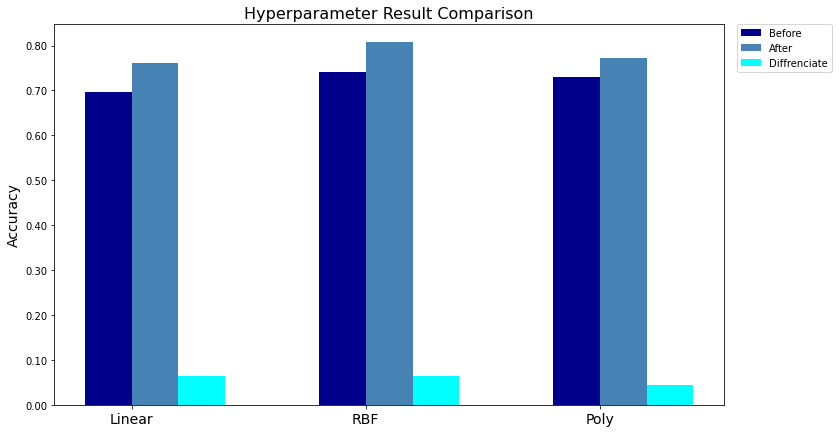

In [19]:
import numpy as np
from matplotlib.ticker import FormatStrFormatter

import matplotlib.pyplot as plt
%matplotlib inline

name = ['Linear in Default', 'Linear After Hyperparameter Tuning', 'RBF in Default', 
        'RBF After Hyperparameter Tuning', 'Poly in Default',
        'Poly After Hyperparameter Tuning']

kernel_accuracy = [cv_linear.mean(), cross_val_score_linear.mean(),
                  cv_rbf.mean(), cross_val_score_rbf.mean(),
                  cv_poly.mean(), cross_val_score_poly.mean()]

name = ['Linear', 'RBF', 'Poly']
before_HT = [cv_linear.mean(), cv_rbf.mean(), cv_poly.mean()]
after_HT = [cross_val_score_linear.mean(), cross_val_score_rbf.mean(), cross_val_score_poly.mean()]
diff_linear = ((cross_val_score_linear.mean()-cv_linear.mean()))
diff_rbf = ((cross_val_score_rbf.mean()-cv_rbf.mean()))
diff_poly = ((cross_val_score_poly.mean()-cv_poly.mean()))
diff_HT = [diff_linear, diff_rbf, diff_poly]

x = np.arange(len(name))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 7))

bfr = ax.bar(x - width/2, before_HT, width, label='Before', color='darkblue')
aftr = ax.bar(x + width/2, after_HT, width, label='After', color='steelblue')
diff = ax.bar(x + 0.3, diff_HT, width, label='Diffrenciate', color='cyan')
# diff_HT = ax.bar(x + width/2, diff_all, width, label='Diffrence', color='red')

ax.set_title('Hyperparameter Result Comparison', size=16)
ax.set_ylabel('Accuracy', size=14)
ax.set_xticks(x)
ax.set_xticklabels(name, size=14)
ax.legend(fontsize=14)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
plt.savefig('analysis-fig/hyperparameter-tuning.png')
plt.show()

In [20]:
print("Before HyperParameter (Linear): ", before_HT[0])
print("After HyperParameter: (Linear)", after_HT[0])
print("Diff HyperParameter: (Linear)", diff_HT[0])
print("============================")
print("Before HyperParameter (RBF): ", before_HT[1])
print("After HyperParameter: (RBF)", after_HT[1])
print("Diff HyperParameter: (RBF)", diff_HT[1])
print("============================")
print("Before HyperParameter (Poly): ", before_HT[2])
print("After HyperParameter: (Poly)", after_HT[2])
print("Diff HyperParameter: (Poly)", diff_HT[2])

Before HyperParameter (Linear):  0.697076023391813
After HyperParameter: (Linear) 0.7619883040935672
Diff HyperParameter: (Linear) 0.06491228070175425
Before HyperParameter (RBF):  0.7421052631578948
After HyperParameter: (RBF) 0.8070175438596492
Diff HyperParameter: (RBF) 0.06491228070175437
Before HyperParameter (Poly):  0.7298245614035087
After HyperParameter: (Poly) 0.7730994152046784
Diff HyperParameter: (Poly) 0.04327485380116969


### Summary of Hyperparameter Tuning

In [21]:
print("Top selected parameter after Hyperparameter Tuning")
print("Linear: ", best_params_linear_ht)
print("RBF: ", best_params_rbf_ht)
print("Poly: ", best_params_poly_HT)

Top selected parameter after Hyperparameter Tuning
Linear:  {'C': 0.1, 'degree': 1, 'gamma': 'auto', 'kernel': 'linear'}
RBF:  {'C': 10, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Poly:  {'C': 0.001, 'degree': 6, 'gamma': 'auto', 'kernel': 'poly'}


In [22]:
print("Accuracy with Linear Kernel: ", cross_val_score_linear.mean())
print("Accuracy with RBF Kernel: ", cross_val_score_rbf.mean())
print("Accuracy with Poly Kernel: ", cross_val_score_poly.mean())

Accuracy with Linear Kernel:  0.7619883040935672
Accuracy with RBF Kernel:  0.8070175438596492
Accuracy with Poly Kernel:  0.7730994152046784
